In [240]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

import data_utils
import train_utils
import models

%reload_ext autoreload
%autoreload 2

In [22]:
dev = data_utils.COAD_dataset(data_utils.COAD_DEV)
dev_loader = torch.utils.data.DataLoader(dev, batch_size=1, shuffle=True , pin_memory=True)

In [253]:
n_conv_layers = 2
n_fc_layers = 2
kernel_size = [4,3]
n_conv_filters = [36,48]
hidden_size = [512,512]
dropout=0.5
net = models.ConvNet(n_conv_layers, n_fc_layers, kernel_size, n_conv_filters, hidden_size, dropout=dropout)
net.cuda()

ConvNet(
  (m): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (n): Dropout(p=0.5)
  (relu): ReLU()
  (conv): Sequential(
    (0): Conv2d(3, 36, kernel_size=(4, 4), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(36, 48, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Sequential(
    (0): Linear(in_features=1200, out_features=512, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5)
    (3): Linear(in_features=512, out_features=512, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.5)
  )
  (classification_layer): Linear(in_features=512, out_features=2, bias=True)
)

In [254]:
epochs = 100 
criterion = nn.CrossEntropyLoss()

In [255]:
lr = 0.0001
weight_decay = 0.0005

In [250]:
optimizer = torch.optim.Adam(net.parameters(), lr=lr, weight_decay=weight_decay)

In [286]:
train = data_utils.COAD_dataset(data_utils.COAD_TRAIN)
train_loader = torch.utils.data.DataLoader(train, batch_size=1, shuffle=True , pin_memory=True)

valid = data_utils.COAD_dataset(data_utils.COAD_VALID)
valid_loader = torch.utils.data.DataLoader(valid, batch_size=1, shuffle=False , pin_memory=True)

In [182]:
#scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode="min", patience=4)

In [185]:
def pool_fn(x):
    #v,a = torch.max(x,0)
    v = torch.mean(x,0)
    return v

best_loss = 1e8
for e in range(epochs):
    train_utils.embedding_training_loop(e, train_loader, net, criterion, optimizer,pool_fn)
    loss = train_utils.embedding_validation_loop(e, valid_loader, net, criterion,pool_fn)
    #scheduler.step(loss)
    print('LR = {}'.format(optimizer.state_dict()['param_groups'][0]['lr']))
    if loss < best_loss:
        torch.save(net.state_dict(),'best_convnet.pt')
        best_loss = loss
        print('WROTE MODEL')

Epoch: 0, Train NLL: 34.7338
Epoch: 0, Val NLL: 34.2249, Val Acc: 0.4082
LR = 0.0001
WROTE MODEL
Epoch: 1, Train NLL: 34.9582
Epoch: 1, Val NLL: 34.6048, Val Acc: 0.4082
LR = 0.0001
Epoch: 2, Train NLL: 34.5777
Epoch: 2, Val NLL: 34.9021, Val Acc: 0.4082
LR = 0.0001
Epoch: 3, Train NLL: 34.5222
Epoch: 3, Val NLL: 34.5258, Val Acc: 0.4082
LR = 0.0001
Epoch: 4, Train NLL: 34.3403
Epoch: 4, Val NLL: 34.9956, Val Acc: 0.4082
LR = 0.0001
Epoch: 5, Train NLL: 34.3574
Epoch: 5, Val NLL: 35.1883, Val Acc: 0.4082
LR = 0.0001
Epoch: 6, Train NLL: 34.3542
Epoch: 6, Val NLL: 34.9374, Val Acc: 0.4082
LR = 0.0001
Epoch: 7, Train NLL: 34.1592
Epoch: 7, Val NLL: 35.0457, Val Acc: 0.4082
LR = 0.0001
Epoch: 8, Train NLL: 34.6030
Epoch: 8, Val NLL: 34.4113, Val Acc: 0.4082
LR = 0.0001
Epoch: 9, Train NLL: 34.4462
Epoch: 9, Val NLL: 34.1298, Val Acc: 0.4082
LR = 0.0001
WROTE MODEL
Epoch: 10, Train NLL: 34.1670
Epoch: 10, Val NLL: 34.7604, Val Acc: 0.4082
LR = 0.0001
Epoch: 11, Train NLL: 33.8684
Epoch: 11

Epoch: 93, Train NLL: 0.0510
Epoch: 93, Val NLL: 15.1567, Val Acc: 0.8571
LR = 0.0001
Epoch: 94, Train NLL: 0.0536
Epoch: 94, Val NLL: 15.3927, Val Acc: 0.8571
LR = 0.0001
Epoch: 95, Train NLL: 0.0487
Epoch: 95, Val NLL: 15.2665, Val Acc: 0.8571
LR = 0.0001
Epoch: 96, Train NLL: 0.0415
Epoch: 96, Val NLL: 15.4121, Val Acc: 0.8571
LR = 0.0001
Epoch: 97, Train NLL: 0.0411
Epoch: 97, Val NLL: 15.6417, Val Acc: 0.8571
LR = 0.0001
Epoch: 98, Train NLL: 0.0410
Epoch: 98, Val NLL: 15.5140, Val Acc: 0.8571
LR = 0.0001
Epoch: 99, Train NLL: 0.0371
Epoch: 99, Val NLL: 15.9755, Val Acc: 0.8776
LR = 0.0001


In [191]:
def pool_fn(x):
    #v,a = torch.max(x,0)
    v = torch.mean(x,0)
    return v

best_loss = 1e8
for e in range(epochs):
    train_utils.instance_training_loop(e, train_loader, net, criterion, optimizer,pool_fn)
    loss = train_utils.instance_validation_loop(e, valid_loader, net, criterion,pool_fn)
    #scheduler.step(loss)
    print('LR = {}'.format(optimizer.state_dict()['param_groups'][0]['lr']))
    if loss < best_loss:
        torch.save(net.state_dict(),'best_convnet.pt')
        best_loss = loss
        print('WROTE MODEL')

Epoch: 0, Train NLL: 34.7253
Epoch: 0, Val NLL: 34.5098, Val Acc: 0.4082
LR = 0.0001
WROTE MODEL
Epoch: 1, Train NLL: 34.4373
Epoch: 1, Val NLL: 34.9781, Val Acc: 0.4082
LR = 0.0001
Epoch: 2, Train NLL: 34.5094
Epoch: 2, Val NLL: 34.7606, Val Acc: 0.4082
LR = 0.0001
Epoch: 3, Train NLL: 34.5293
Epoch: 3, Val NLL: 34.8371, Val Acc: 0.4082
LR = 0.0001
Epoch: 4, Train NLL: 34.3855
Epoch: 4, Val NLL: 34.7604, Val Acc: 0.4082
LR = 0.0001
Epoch: 5, Train NLL: 34.3665
Epoch: 5, Val NLL: 34.9662, Val Acc: 0.4082
LR = 0.0001
Epoch: 6, Train NLL: 34.3384
Epoch: 6, Val NLL: 34.5777, Val Acc: 0.4082
LR = 0.0001
Epoch: 7, Train NLL: 34.4144
Epoch: 7, Val NLL: 34.7917, Val Acc: 0.4082
LR = 0.0001
Epoch: 8, Train NLL: 34.3746
Epoch: 8, Val NLL: 34.8322, Val Acc: 0.4082
LR = 0.0001
Epoch: 9, Train NLL: 34.3017
Epoch: 9, Val NLL: 34.5868, Val Acc: 0.4082
LR = 0.0001
Epoch: 10, Train NLL: 34.4337
Epoch: 10, Val NLL: 34.3766, Val Acc: 0.4082
LR = 0.0001
WROTE MODEL
Epoch: 11, Train NLL: 34.4705
Epoch: 11

Epoch: 90, Train NLL: 9.8912
Epoch: 90, Val NLL: 5.6295, Val Acc: 0.9592
LR = 0.0001
Epoch: 91, Train NLL: 10.3956
Epoch: 91, Val NLL: 5.7194, Val Acc: 0.9592
LR = 0.0001
Epoch: 92, Train NLL: 10.2883
Epoch: 92, Val NLL: 4.0148, Val Acc: 1.0000
LR = 0.0001
WROTE MODEL
Epoch: 93, Train NLL: 11.6157
Epoch: 93, Val NLL: 4.6198, Val Acc: 1.0000
LR = 0.0001
Epoch: 94, Train NLL: 9.5605
Epoch: 94, Val NLL: 5.2011, Val Acc: 0.9592
LR = 0.0001
Epoch: 95, Train NLL: 10.8057
Epoch: 95, Val NLL: 3.4065, Val Acc: 1.0000
LR = 0.0001
WROTE MODEL
Epoch: 96, Train NLL: 10.0294
Epoch: 96, Val NLL: 6.4258, Val Acc: 0.9388
LR = 0.0001
Epoch: 97, Train NLL: 10.6172
Epoch: 97, Val NLL: 4.5113, Val Acc: 0.9592
LR = 0.0001
Epoch: 98, Train NLL: 10.2490
Epoch: 98, Val NLL: 3.9005, Val Acc: 1.0000
LR = 0.0001
Epoch: 99, Train NLL: 9.6537
Epoch: 99, Val NLL: 3.8658, Val Acc: 1.0000
LR = 0.0001


In [271]:
input_size = 512
hidden_size = 512
output_size = 1
attn = models.Attention(input_size, hidden_size, output_size)
attn.cuda()

Attention(
  (V): Linear(in_features=512, out_features=512, bias=True)
  (U): Linear(in_features=512, out_features=512, bias=True)
  (w): Linear(in_features=512, out_features=1, bias=True)
  (sigm): Sigmoid()
  (tanh): Tanh()
  (sm): Softmax()
)

In [272]:
parameters = [p for p in net.parameters()]
parameters.extend([p for p in attn.parameters()])

10
16


In [273]:
optimizer = torch.optim.Adam(parameters, lr=lr, weight_decay=weight_decay)

In [274]:
pool_fn = models.pool(attn)

In [275]:
best_loss = 1e8
for e in range(epochs):
    train_utils.embedding_training_loop(e, train_loader, net, criterion, optimizer,pool_fn)
    loss = train_utils.embedding_validation_loop(e, valid_loader, net, criterion,pool_fn)
    #scheduler.step(loss)
    print('LR = {}'.format(optimizer.state_dict()['param_groups'][0]['lr']))
    if loss < best_loss:
        torch.save(net.state_dict(),'best_convnet.pt')
        best_loss = loss
        print('WROTE MODEL')

Epoch: 0, Train NLL: 36.3695
Epoch: 0, Val NLL: 13.1936, Val Acc: 0.9184
LR = 0.0001
WROTE MODEL
Epoch: 1, Train NLL: 23.3966
Epoch: 1, Val NLL: 12.8997, Val Acc: 0.8571
LR = 0.0001
WROTE MODEL
Epoch: 2, Train NLL: 21.6930
Epoch: 2, Val NLL: 10.4790, Val Acc: 0.9592
LR = 0.0001
WROTE MODEL
Epoch: 3, Train NLL: 21.4550
Epoch: 3, Val NLL: 10.6860, Val Acc: 0.9592
LR = 0.0001
Epoch: 4, Train NLL: 17.1530
Epoch: 4, Val NLL: 7.5403, Val Acc: 0.9592
LR = 0.0001
WROTE MODEL
Epoch: 5, Train NLL: 17.4845
Epoch: 5, Val NLL: 15.7223, Val Acc: 0.7959
LR = 0.0001
Epoch: 6, Train NLL: 14.2360
Epoch: 6, Val NLL: 11.0135, Val Acc: 0.8776
LR = 0.0001
Epoch: 7, Train NLL: 14.9422
Epoch: 7, Val NLL: 9.5805, Val Acc: 0.8980
LR = 0.0001
Epoch: 8, Train NLL: 14.9471
Epoch: 8, Val NLL: 9.3346, Val Acc: 0.8980
LR = 0.0001
Epoch: 9, Train NLL: 12.4348
Epoch: 9, Val NLL: 8.6279, Val Acc: 0.9592
LR = 0.0001
Epoch: 10, Train NLL: 10.7512
Epoch: 10, Val NLL: 11.2978, Val Acc: 0.9388
LR = 0.0001
Epoch: 11, Train NL

Epoch: 95, Train NLL: 3.0944
Epoch: 95, Val NLL: 7.2664, Val Acc: 0.9592
LR = 0.0001
Epoch: 96, Train NLL: 1.8710
Epoch: 96, Val NLL: 15.8971, Val Acc: 0.8980
LR = 0.0001
Epoch: 97, Train NLL: 3.3768
Epoch: 97, Val NLL: 9.8164, Val Acc: 0.9184
LR = 0.0001
Epoch: 98, Train NLL: 2.3002
Epoch: 98, Val NLL: 13.3708, Val Acc: 0.9184
LR = 0.0001
Epoch: 99, Train NLL: 5.9756
Epoch: 99, Val NLL: 15.4217, Val Acc: 0.8571
LR = 0.0001


In [416]:
all_a = []
net.eval()
for slide,label in valid_loader:
    h = net(slide.squeeze_().cuda())
    a = attn(h)
    if label == 1:
        all_a.append(a.detach().cpu().numpy())
        break

In [419]:
results_dict = dict()
types = ['epi','fibro','other','inf']
for t in types:
        results_dict[t] = []
slide_idxs = np.argwhere(np.array(valid.labels)==1)
positives = [valid.cell_labels[idx[0]] for idx in slide_idxs]
for arr,labels in zip(all_a,positives):
    types = np.unique(labels)
    for t in types:
        ix = [c == t for c in labels]
        results_dict[t].extend(arr[ix])
   

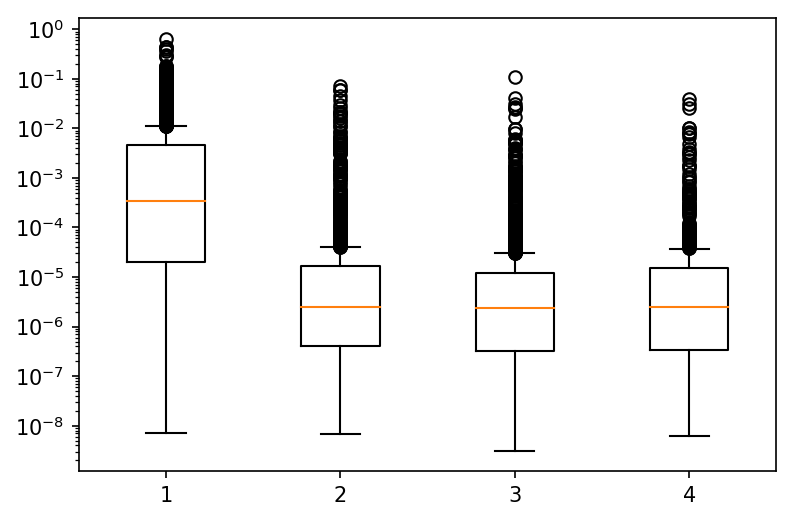

In [418]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
fig,ax = plt.subplots(1,1)
plt.boxplot([np.stack(results_dict['epi']),np.stack(results_dict['fibro']),np.stack(results_dict['inf']),np.stack(results_dict['other'])])
ax.semilogy()
fig.set_dpi(150)

In [420]:
from scipy.stats import mannwhitneyu
mannwhitneyu(np.stack(results_dict['epi']),np.concatenate([np.stack(results_dict['fibro']),np.stack(results_dict['inf']),np.stack(results_dict['other'])]))

MannwhitneyuResult(statistic=4039.0, pvalue=6.893360810302579e-43)

In [426]:
image = np.zeros([500,500,3])
locs = valid.cell_locs[0]
a_np = a.detach().cpu().numpy()
for i,tile in enumerate(slide):    
    image[locs[i][1]-13:locs[i][1]+14,locs[i][0]-13:locs[i][0]+14] = tile.numpy().reshape(27,27,3)#*255.0*((a_np[i]-a_min)/(a_max - a_min))

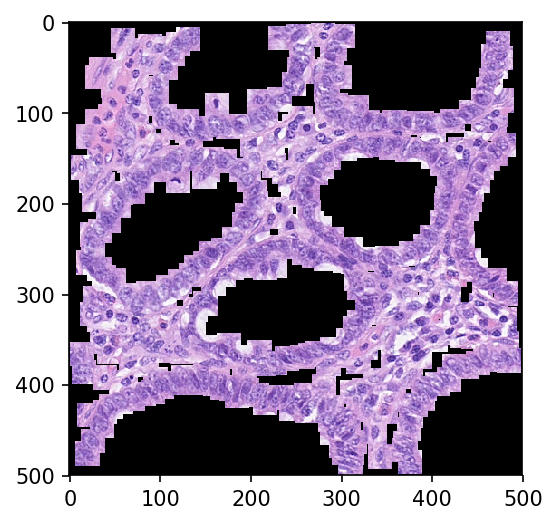

In [427]:
fig,ax = plt.subplots(1,1)
plt.imshow(image)
fig.set_dpi(150)

In [441]:
image = np.zeros([500,500,3])
locs = valid.cell_locs[0]
a_np = a.detach().cpu().numpy()
for i,tile in enumerate(slide):    
    image[locs[i][1]-13:locs[i][1]+14,locs[i][0]-13:locs[i][0]+14] = tile.numpy().reshape(27,27,3)*50*((a_np[i]-a_min)/(a_max - a_min))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


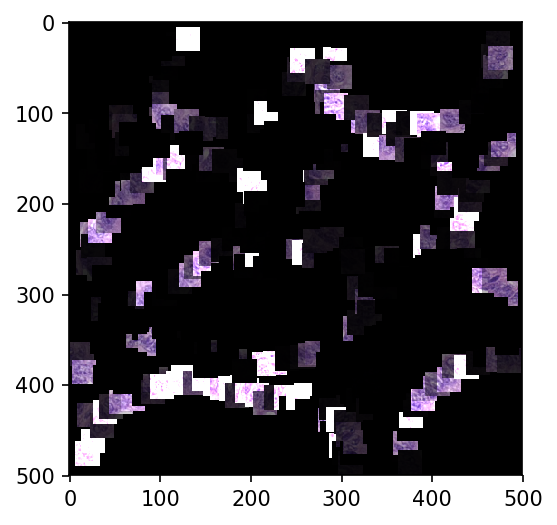

In [442]:
fig,ax = plt.subplots(1,1)
plt.imshow(image)
fig.set_dpi(150)

(array([141.,  11.,   7.,   3.,   0.,   1.,   2.,   1.,   1.,   2.,   2.,
          1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

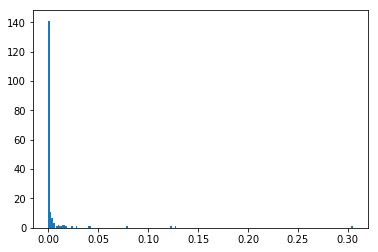

In [413]:
plt.hist(a_np,bins=200)

1